# Selecionando parâmetros para o KNN

Neste notebook selecionaremos o melhor valor de K para o algoritmo de seleção KNN

### Importar as bibliotecas

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

### Carregar os dados 

In [3]:
# Dados de treinameto
training_mean = pd.read_csv("data/training_mean.csv").set_index('sessionNo') # Missing values substituídos pela média
training_mode = pd.read_csv("data/training_mode.csv").set_index('sessionNo') # Missing values substituídos pela moda
training_median = pd.read_csv("data/training_median.csv").set_index('sessionNo') # Missing values substitídos pela mediana

# Dados de teste
testing_mean = pd.read_csv("data/testing_mean.csv").set_index('sessionNo') # Missing values substituídos pela média
testing_mode = pd.read_csv("data/testing_mode.csv").set_index('sessionNo') # Missing values substituídos pela moda
testing_median = pd.read_csv("data/testing_median.csv").set_index('sessionNo') # Missing values substitídos pela mediana

## Escolher o melhor parâmetro K para o KNN e a melhot estratégia para tratamento de missing values

### Separar os dados de treinamento e teste em um vetor de características e  um vetor de classes

In [4]:
def splitData(df):
    x_train = df.iloc[:, :-1]
    y_train = df['order']
    return x_train, y_train

x_test = testing_mean.iloc[:, :-1]
y_test = testing_mean['order']

### Realizar a classificação

Variando o valor de k entre 1 e 201 passo 2

In [12]:
def makeErrosKnn(x_train, y_train, length):
    ks = list(range(1, length, 2))
    erros = []
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        knn.fit(x_train, y_train)
        erros.append(abs(y_test - knn.predict(x_test)).sum())
    return erros

### Melhor K para a estratégia de substituir missing values pela média

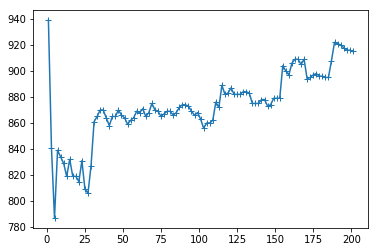

787.0


In [14]:
x_train, y_train = splitData(training_mean)
erros = makeErrosKnn(x_train, y_train, 203)
plt.plot(list(range(1, 203, 2)), erros, marker='+')
plt.show()
print(min(erros))

### Melhor K para a estratégia de substituir missing values pela moda

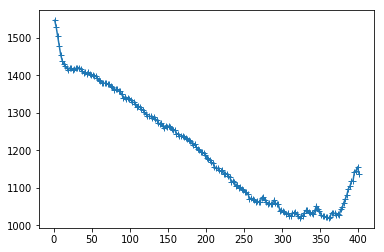

1020.0


In [18]:
x_train, y_train = splitData(training_mode)
erros = makeErrosKnn(x_train, y_train, 403)
plt.plot(list(range(1, 403, 2)), erros, marker='+')
plt.show()
print(min(erros))

### Melhor K para a estratégia de substituir missing values pela mediana

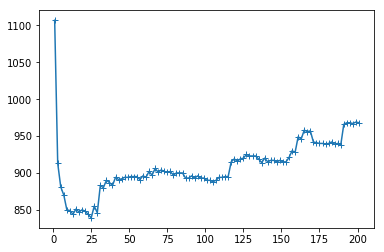

839.0


In [16]:
x_train, y_train = splitData(training_median)
erros = makeErrosKnn(x_train, y_train, 203)
plt.plot(list(range(1, 203, 2)), erros, marker='+')
plt.show()
print(min(erros))

## Escolher a melhor quantidade de estimadores para o RF e a melhot estratégia para tratamento de missing values

In [21]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [115]:
clf.fit(data_train.values[:,:-1],data_train.values[:,-1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [116]:
score2 = clf.predict(data_test.values)

In [117]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(prediction_test['prediction'],score2)

In [118]:
auc1 = metrics.auc(fpr1,tpr1)

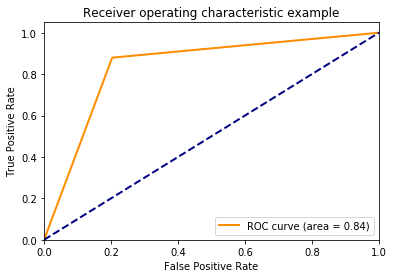

In [119]:
plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [121]:
tree = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)

In [122]:
clf1.fit(data_train.values[:,:-1],data_train.values[:,-1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [123]:
score3 = clf1.predict(data_test.values)

In [124]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(prediction_test['prediction'],score3)

In [125]:
auc2 = metrics.auc(fpr2,tpr2)

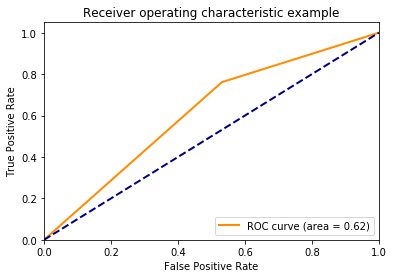

In [126]:
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()